In [1]:
import pandas as pd

In [2]:
rutas = pd.read_csv('rutas_turisticas.csv')

In [3]:
transporte = pd.read_csv('uso_transporte.csv')

In [4]:
ocupacion = pd.read_csv('ocupacion_hotelera.csv')

In [5]:
opiniones = pd.read_csv('opiniones_turisticas.csv')

In [6]:
sostenibilidad = pd.read_csv('datos_sostenibilidad.csv')

### Dataset con la puntuación media de los 166 servicios de GreenLake.

In [13]:
# Agrupar opiniones por nombre_servicio y calcular la media de las puntuaciones
conteo_servicios = opiniones['nombre_servicio'].value_counts().to_dict()
opiniones_agrupadas = opiniones.groupby(['nombre_servicio', 'tipo_servicio']).agg({'puntuacion': 'mean'}).reset_index()
opiniones_agrupadas['Num_opiniones'] = opiniones['nombre_servicio'].map(conteo_servicios)

# Renombrar la columna de puntuacion a media_puntuacion
opiniones_agrupadas.rename(columns={'puntuacion': 'media_puntuacion'}, inplace=True)

opiniones_agrupadas['descripcion_servicio'] = opiniones_agrupadas.apply(
    lambda row: row['tipo_servicio'] if row['tipo_servicio'] in ['Hotel', 'Ruta'] else row['nombre_servicio'].split()[-1],
    axis=1
)
opiniones_agrupadas['descripcion_servicio'] = opiniones_agrupadas['descripcion_servicio'].replace('Guiado', 'Tour Guiado')

## Ocupación hoteles

/var/folders/k2/p_2k6jgx3836yjfwy9gj_mgc0000gn/T/ipykernel_89857/907585400.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prolliant_data['fecha'] = pd.to_datetime(prolliant_data['fecha'])


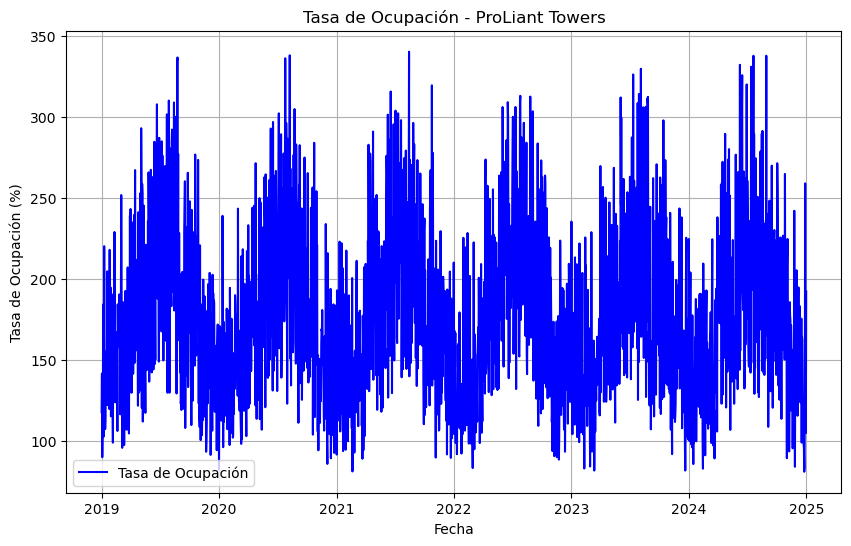

In [13]:
import matplotlib.pyplot as plt

# Filtrar los datos del hotel "ProLiant Towers"
prolliant_data = ocupacion[ocupacion['hotel_nombre'] == 'Aruba Luxury Lodge']

# Convertir la columna 'fecha' a formato datetime para una mejor representación
prolliant_data['fecha'] = pd.to_datetime(prolliant_data['fecha'])

# Representar la tasa de ocupación en función de la fecha
plt.figure(figsize=(10, 6))
plt.plot(prolliant_data['fecha'], prolliant_data['precio_promedio_noche'], label='Tasa de Ocupación', color='blue')
plt.title('Tasa de Ocupación - ProLiant Towers')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Ocupación (%)')
plt.legend()
plt.grid()
plt.show()

In [18]:
# Asegurarse de que la columna 'fecha' esté en formato datetime
ocupacion['fecha'] = pd.to_datetime(ocupacion['fecha'])

# Crear las nuevas columnas
ocupacion['dia_semana'] = ocupacion['fecha'].dt.weekday  # Día de la semana (0=Lunes, 6=Domingo)
ocupacion['mes'] = ocupacion['fecha'].dt.month  # Mes
ocupacion['semana'] = ocupacion['fecha'].dt.isocalendar().week  # Semana del año